In [ ]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/winequality-white.csv', delimiter=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### **Visualization**

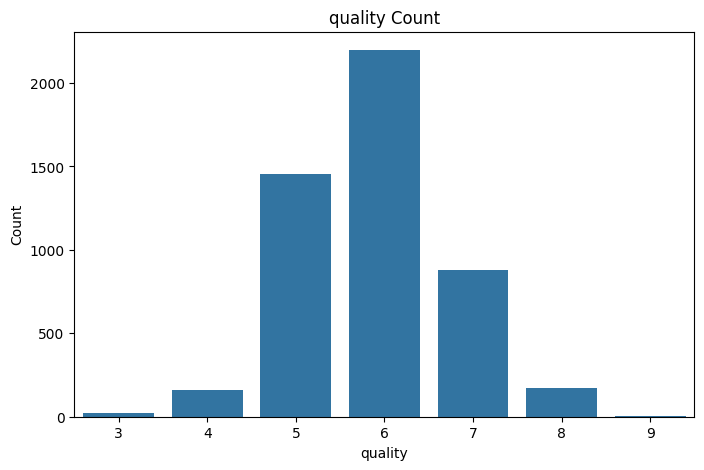

In [ ]:
#using Bar chat
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title('quality Count')
plt.xlabel('quality')
plt.ylabel('Count')
plt.show()

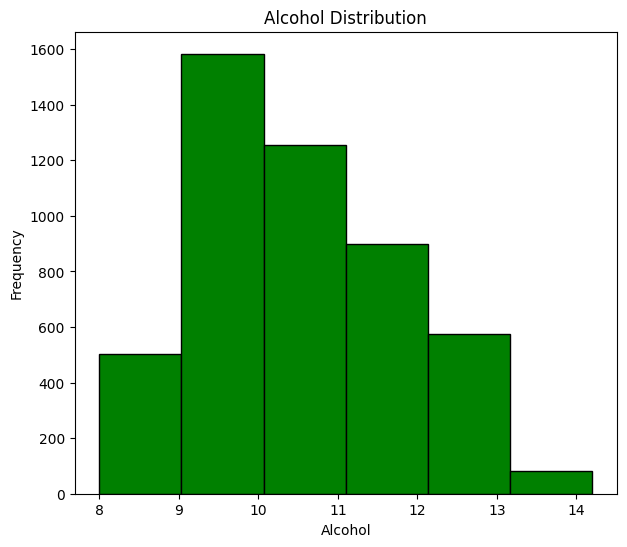

In [ ]:
#using histogram
plt.figure(figsize=(7,6))
df['alcohol'].plot(kind='hist',color='green',bins=6,edgecolor='black')
plt.title('Alcohol Distribution')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

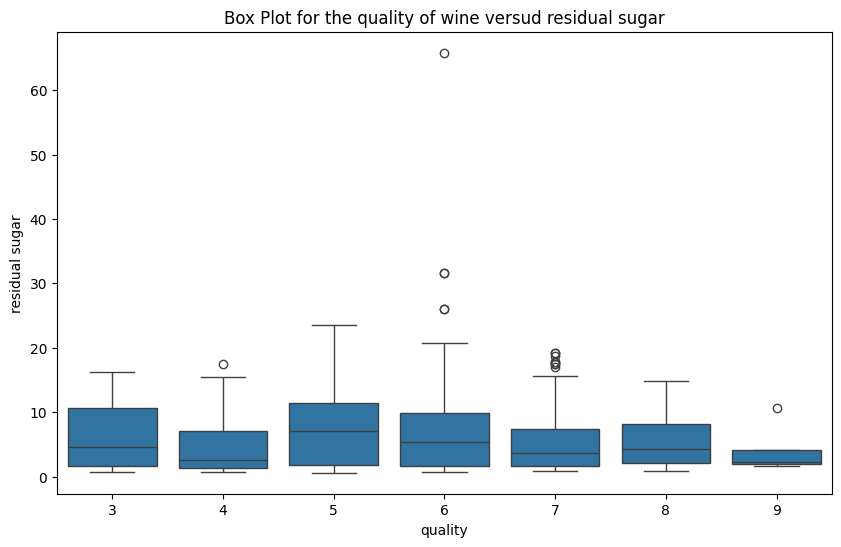

In [ ]:
#Boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x='quality',y='residual sugar',data=df)
plt.title('Box Plot for the quality of wine versud residual sugar')
plt.show()

**Splitting the data set**

In [ ]:
X=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
y.head(5)

,quality
0,6
1,6
2,6
3,6
4,6


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
X=scaled.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3673, 11), (1225, 11), (3673,), (1225,))

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error,r2_score
y_lr_pred=lr.predict(X_test)
print(y_lr_pred)

[6.37023752 6.40656038 6.40616237 ... 6.32887113 6.54022797 5.91359891]


In [38]:
#Calculating evaluation metrics
MAE= mean_absolute_error(y_test,y_lr_pred)
MSE= mean_squared_error(y_test,y_lr_pred)
R2= r2_score(y_test,y_lr_pred)

print('MAE:',MAE)
print('MSE:',MSE)
print('R2:',R2)


MAE: 0.583614774136087
MSE: 0.5645877915189054
R2: 0.2727562934675566


**Support Vector Regression**

In [20]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [23]:
#predicting y
y_svr_pred=svr.predict(X_test)
print(y_svr_pred)

[6.1709534  6.64789673 6.55771674 ... 6.51375721 6.80255787 5.93920061]


In [39]:
#calculating evaluation metrics
MAE= mean_absolute_error(y_test,y_svr_pred)
MSE= mean_squared_error(y_test,y_svr_pred)
R2= r2_score(y_test,y_svr_pred)

print('MAE:',MAE)
print('MSE:',MSE)
print('R2:',R2)

MAE: 0.5173585831732161
MSE: 0.4750325434172284
R2: 0.38811211863281847


**Random Forest Regression**

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [30]:
#predicting y
y_rfr_pred=rfr.predict(X_test)
print(y_rfr_pred)

[6.85 7.49 6.73 ... 6.17 6.61 5.91]


In [37]:
#calculating the evaluation metrics
MAE= mean_absolute_error(y_test,y_rfr_pred)
MSE= mean_squared_error(y_test,y_rfr_pred)
R2= r2_score(y_test,y_rfr_pred)

print('MAE:',MAE)
print('MSE:',MSE)
print('R2:',R2)


MAE: 0.4246285714285714
MSE: 0.35850963265306124
R2: 0.5382049027720315
